In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

#plt.style.use('seaborn-white')
#plt.style.use('fivethirtyeight')
import matplotlib as mpl
import datetime as dt


plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams.update({'font.size': 22})

plt.style.use('seaborn-poster')

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# FRED

# 1. Savings and debt

## 1.1 Savings

In [1]:
api = 'YOURKEYHERE'
from fredapi import Fred
fred = Fred(api_key=api)

In [2]:
saving = fred.get_series('PSAVERT')
saving.head(2)

1959-01-01    11.3
1959-02-01    10.6
dtype: float64

In [3]:
deficit = fred.get_series('FYFSGDA188S')
deficit.head(2)

1929-01-01    0.70202
1930-01-01    0.80078
dtype: float64

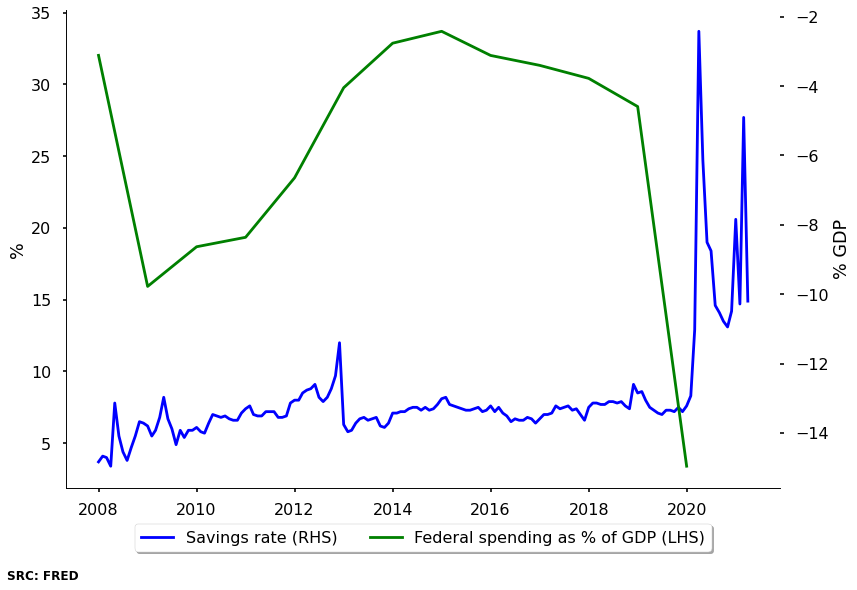

In [7]:


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
a, =  ax1.plot(saving['2008':].index, saving['2008':].values, 
               color= 'blue', label= 'Savings rate (RHS)')

ax1.set_ylabel('%')

b, = ax2.plot(deficit['2008':].index, deficit['2008':].values, 
              color= 'green', label= 'Federal spending as % of GDP (LHS)')

ax2.set_ylabel('% GDP')


p = [a, b]
ax1.legend(p, [p_.get_label() for p_ in p],
          bbox_to_anchor=[0.5, -.15],
           loc='lower center', 
           ncol=5, 
           shadow=True)



txt="SRC: FRED"

plt.figtext(.1, -.02, txt, fontweight='bold', wrap=True, horizontalalignment='center', fontsize=12)

ax1.grid(False)